# Homework Assignment 2

## Section 1: Admissions Dataset

In [1]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn')

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.grid_search import RandomizedSearchCV
from sklearn import preprocessing

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

**Answer 1:** 
Target is admit. Features are gre, gpa and prestige.  
Prestige is categorical. Null accuracy is 68.25%


In [4]:
admissions.admit.value_counts(normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [5]:
dummy = pd.get_dummies(admissions['prestige'], prefix = 'pres', drop_first = False)
df = pd.concat([admissions,dummy], axis=1)
df.drop('prestige', axis=1, inplace=True)


**Question 2:**

What do you think is the goal of using machine learning with this dataset.

**Answer 2:** To predict admission based on gre, gpa and prestige

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

**Answer 3:** Looking at the graph, I see a trend of admission base on higher gpa 
and gre.

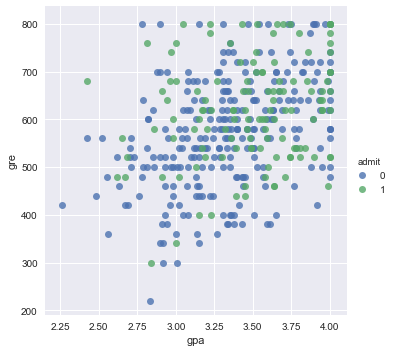

In [6]:
plt.figure(figsize=(12,8))
sns.lmplot(x="gpa", y="gre", data=df, hue='admit', fit_reg=False)
plt.show()

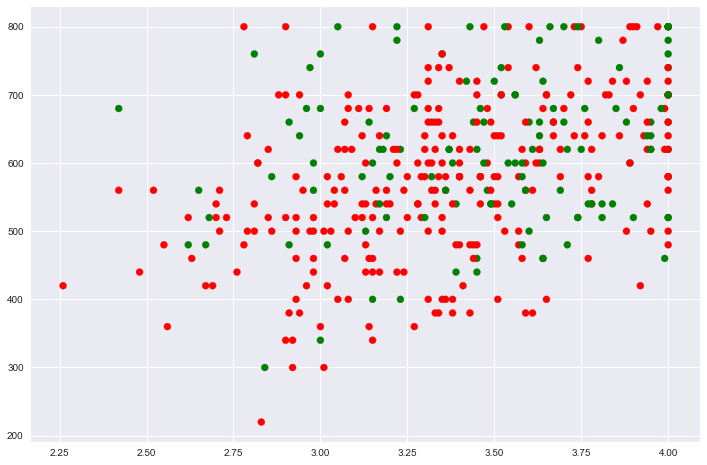

In [7]:
plt.figure(figsize=(12,8))
color_map={0:'red',1:'green'}
plt.scatter(df['gpa'],df['gre'],c=df['admit'].map(color_map))
plt.show()

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

**Answer 4:** 

Training score is 70%, Test score is 74%.  Test score is better not overfitting.  

In [17]:
df.isnull().sum()

admit       0
gre         0
gpa         0
pres_1.0    0
pres_2.0    0
pres_3.0    0
pres_4.0    0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)]

,admit,gre,gpa,pres_1.0,pres_2.0,pres_3.0,pres_4.0


In [19]:
df= df.dropna()

In [20]:
df.isnull().sum()

admit       0
gre         0
gpa         0
pres_1.0    0
pres_2.0    0
pres_3.0    0
pres_4.0    0
dtype: int64

In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.24,random_state=38)

In [23]:
model = LogisticRegression()

model.fit(X_train,y_train)
model.score(X_train,y_train)


0.69767441860465118

In [24]:
model.score(X_test,y_test)

0.73958333333333337

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

**Answer 5:** 

KNN:

0.6507554978839613
'n_neighbors': 15

DT:

0.660693716210089
'criterion': 'gini',
'max_depth': 19,
'max_features': 4,
'min_samples_split': 20

Based on roc_auc score Decision Tree performs better.



In [25]:
neighbors_range = range(1, 21, 2)

In [26]:
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range
param_grid_knn
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid = param_grid_knn, cv = 5, scoring = "roc_auc")

#Fit grid on data
grid_knn.fit(X, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [27]:
grid_knn.grid_scores_

[mean: 0.57362, std: 0.06178, params: {'n_neighbors': 1},
 mean: 0.59840, std: 0.07525, params: {'n_neighbors': 3},
 mean: 0.58816, std: 0.05730, params: {'n_neighbors': 5},
 mean: 0.58774, std: 0.04506, params: {'n_neighbors': 7},
 mean: 0.62517, std: 0.04997, params: {'n_neighbors': 9},
 mean: 0.63512, std: 0.05345, params: {'n_neighbors': 11},
 mean: 0.64636, std: 0.03906, params: {'n_neighbors': 13},
 mean: 0.65076, std: 0.05422, params: {'n_neighbors': 15},
 mean: 0.63702, std: 0.05738, params: {'n_neighbors': 17},
 mean: 0.62355, std: 0.05033, params: {'n_neighbors': 19}]

In [28]:
grid_knn.best_score_

0.6507554978839613

In [29]:
grid_knn.best_params_

{'n_neighbors': 15}

In [30]:
depths_range = range(2, 20)
param_grid_dt = {"criterion": ["gini", "entropy"], "max_depth": depths_range}
#param_grid_dt["max_depth"] = depths_range
param_grid_dt["min_samples_split"] =[2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5]
param_grid_dt

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'max_features': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 10, 20]}

In [31]:
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "roc_auc")

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_features': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [32]:
grid_dt.best_score_

0.6981334562442876

In [33]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 1,
 'min_samples_split': 10}

In [34]:
grid_rdt = RandomizedSearchCV(estimator = DecisionTreeClassifier(), 
    n_iter = 20,param_distributions = param_grid_dt, cv = 5, 
    scoring = "roc_auc")

grid_rdt.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'min_samples_split': [2, 10, 20], 'max_features': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [35]:
grid_rdt.best_score_

0.6266803016928961

In [36]:
grid_rdt.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 3,
 'min_samples_split': 10}

**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

**Answer 6:** Our school is the most prestigious school in the country. We only accept best of the best, every year only one percent of the applicants are admitted to our school.  We rather have a model that minimizes false positive, we are ok with missing a few students with false negative, we don’t want non qualified students get into our school. 

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

**Answer 7:** Student 1: 36%, Student 2: 26%, Student 3: 51%. 

In [37]:
test ={'gre':[570,750,660,1]}
test = pd.DataFrame(data=test)

In [38]:
test['pga']=[3.6,3.8,3.1,1]

In [39]:
test['prestige']=[2,4,1,3]

In [40]:
test

,gre,pga,prestige
0,570,3.6,2
1,750,3.8,4
2,660,3.1,1
3,1,1.0,3


In [41]:
dummy = pd.get_dummies(test['prestige'], prefix = 'pres', drop_first = False)
test = pd.concat([test,dummy], axis=1)
test.drop('prestige', axis=1, inplace=True)

In [42]:
test = test[test.gre !=1]

In [43]:
test

,gre,pga,pres_1,pres_2,pres_3,pres_4
0,570,3.6,0,1,0,0
1,750,3.8,0,0,0,1
2,660,3.1,1,0,0,0


In [44]:
pred = model.predict_proba(test)

In [45]:
pred

array([[ 0.63517945,  0.36482055],
       [ 0.7403991 ,  0.2596009 ],
       [ 0.48656031,  0.51343969]])

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [640]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [654]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])

data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
haight          4000 non-null float64
mission         4000 non-null float64
soma            4000 non-null float64
sunset          4000 non-null float64
richmond        4000 non-null float64
glen_park       4000 non-null float64
castro          4000 non-null float64
potrero         4000 non-null float64
hayes_valley    4000 non-null float64
fillmore        4000 non-null float64
bernal          4000 non-null float64
marina          4000 non-null float64
north_beach     4000 non-null float64
excelsior       4000 non-null float64
target          4000 non-null int64
dtypes: float64(14), int64(1)
memory usage: 500.0 KB


In [558]:
data.isnull().sum()

haight          0
mission         0
soma            0
sunset          0
richmond        0
glen_park       0
castro          0
potrero         0
hayes_valley    0
fillmore        0
bernal          0
marina          0
north_beach     0
excelsior       0
target          0
dtype: int64

In [655]:
X = data.drop('target', axis=1)
y = data.target

### Null hypothesis: 
- 63.8%

In [560]:
data.target.value_counts(normalize=True)

0    0.63825
1    0.36175
Name: target, dtype: float64

### Use AdaBoost, Xgboost, RandomForest Classifier, get score and feature importances
- AdaBoost: 80%
- Xgboost: 91%
- RandomForest: 87.5%

In [757]:
ada = AdaBoostClassifier(n_estimators=50, random_state=38)
ada.fit(X,y)
cv_score = cross_val_score(ada, X, y, cv =5 , scoring="accuracy").mean()

In [758]:
cv_score

0.79973787029354726

In [658]:
sorted(zip(ada.feature_importances_, X), key = lambda x: x[0], reverse = True)

[(0.14000000000000001, 'glen_park'),
 (0.14000000000000001, 'north_beach'),
 (0.14000000000000001, 'excelsior'),
 (0.12, 'richmond'),
 (0.10000000000000001, 'potrero'),
 (0.080000000000000002, 'mission'),
 (0.080000000000000002, 'bernal'),
 (0.059999999999999998, 'castro'),
 (0.059999999999999998, 'hayes_valley'),
 (0.040000000000000001, 'haight'),
 (0.02, 'soma'),
 (0.02, 'fillmore'),
 (0.0, 'sunset'),
 (0.0, 'marina')]

In [760]:
xg = XGBClassifier(max_depth=7, min_child_weight=3, subsample=0.8, seed=38)
xg.fit(X,y)
cv_score = cross_val_score(xg, X, y, cv =5 , scoring="accuracy").mean()

In [661]:
cv_score

0.90999551014923463

In [660]:
sorted(zip(xg.feature_importances_, X), key = lambda x: x[0], reverse = True)

[(0.12019524, 'glen_park'),
 (0.10311165, 'potrero'),
 (0.10311165, 'bernal'),
 (0.10036608, 'castro'),
 (0.098840758, 'north_beach'),
 (0.079011589, 'hayes_valley'),
 (0.074740693, 'haight'),
 (0.070774861, 'richmond'),
 (0.064368516, 'mission'),
 (0.060402684, 'excelsior'),
 (0.034777302, 'marina'),
 (0.03233679, 'fillmore'),
 (0.029896278, 'sunset'),
 (0.028065894, 'soma')]

In [762]:
rnd = RandomForestClassifier(n_estimators=120, max_depth=8, 
                             min_samples_split= 2, min_samples_leaf=2, 
                             random_state=38)
rnd.fit(X,y)
cv_score = cross_val_score(rnd, X, y, cv =5 , scoring="accuracy").mean()

In [763]:
cv_score

0.87524296952026481

In [623]:
sorted(zip(rnd.feature_importances_, X), key = lambda x: x[0], reverse = True)

[(0.13914278829094123, 'richmond'),
 (0.13228404702970525, 'north_beach'),
 (0.11013388758583119, 'glen_park'),
 (0.10436337406698604, 'potrero'),
 (0.095337922875754766, 'excelsior'),
 (0.082782414239592247, 'mission'),
 (0.080970957184953063, 'castro'),
 (0.075988345333370733, 'haight'),
 (0.068510340784607535, 'hayes_valley'),
 (0.063187450038742127, 'bernal'),
 (0.012660257185622994, 'sunset'),
 (0.01181077416974215, 'soma'),
 (0.011591945759765441, 'fillmore'),
 (0.01123549545438513, 'marina')]

### Drop soma, fillmore, sunset which are at the bottom of Xgboost models
- AdaBoost: 80%
- Xgboost: 91.4%
- RandomForest: 88.3%

Xgboost, RandomForest scores increased

In [707]:
f_cols = ['haight','mission','richmond','glen_park','castro','potrero','hayes_valley',
          'bernal','north_beach','excelsior','marina']
X2 = X[f_cols]

In [764]:
ada.fit(X2,y)
cv_score2 = cross_val_score(ada, X2, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.80023474528866456

In [765]:
xg.fit(X2,y)
cv_score2 = cross_val_score(xg, X2, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.91399332850520076

In [766]:
rnd.fit(X2,y)
cv_score2 = cross_val_score(rnd, X2, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.88324360311500494

### Try feature_importances again

In [740]:
ada_feature = sorted(zip(ada.feature_importances_, X), key = lambda x: x[0], reverse = True)
ada_feature

[(0.14000000000000001, 'soma'),
 (0.14000000000000001, 'castro'),
 (0.14000000000000001, 'fillmore'),
 (0.12, 'richmond'),
 (0.12, 'hayes_valley'),
 (0.10000000000000001, 'glen_park'),
 (0.080000000000000002, 'sunset'),
 (0.059999999999999998, 'haight'),
 (0.059999999999999998, 'mission'),
 (0.040000000000000001, 'potrero')]

In [739]:
xg_feature = sorted(zip(xg.feature_importances_, X2), key = lambda x: x[0], reverse = True)
xg_feature

[(0.1405672, 'richmond'),
 (0.11991369, 'mission'),
 (0.11220715, 'hayes_valley'),
 (0.11066584, 'potrero'),
 (0.10604192, 'glen_park'),
 (0.097102344, 'haight'),
 (0.095869295, 'bernal'),
 (0.085080147, 'castro'),
 (0.0662762, 'north_beach'),
 (0.0662762, 'excelsior')]

In [742]:
rnd_feature = sorted(zip(rnd.feature_importances_, X), key = lambda x: x[0], reverse = True)
rnd_feature

[(0.14436417944889615, 'hayes_valley'),
 (0.13866509162191901, 'soma'),
 (0.12065489794522001, 'sunset'),
 (0.1003961135008689, 'glen_park'),
 (0.095880882539286713, 'fillmore'),
 (0.08660737817359257, 'richmond'),
 (0.08133009331402441, 'haight'),
 (0.07667907774852363, 'mission'),
 (0.074702339582435523, 'potrero'),
 (0.069414445151168458, 'castro'),
 (0.011305500974064501, 'bernal')]

### Since models don't agree with eath ofther, draw some charts to visualize data

In [671]:
data3 = data[f_cols]
data3['target']=y

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


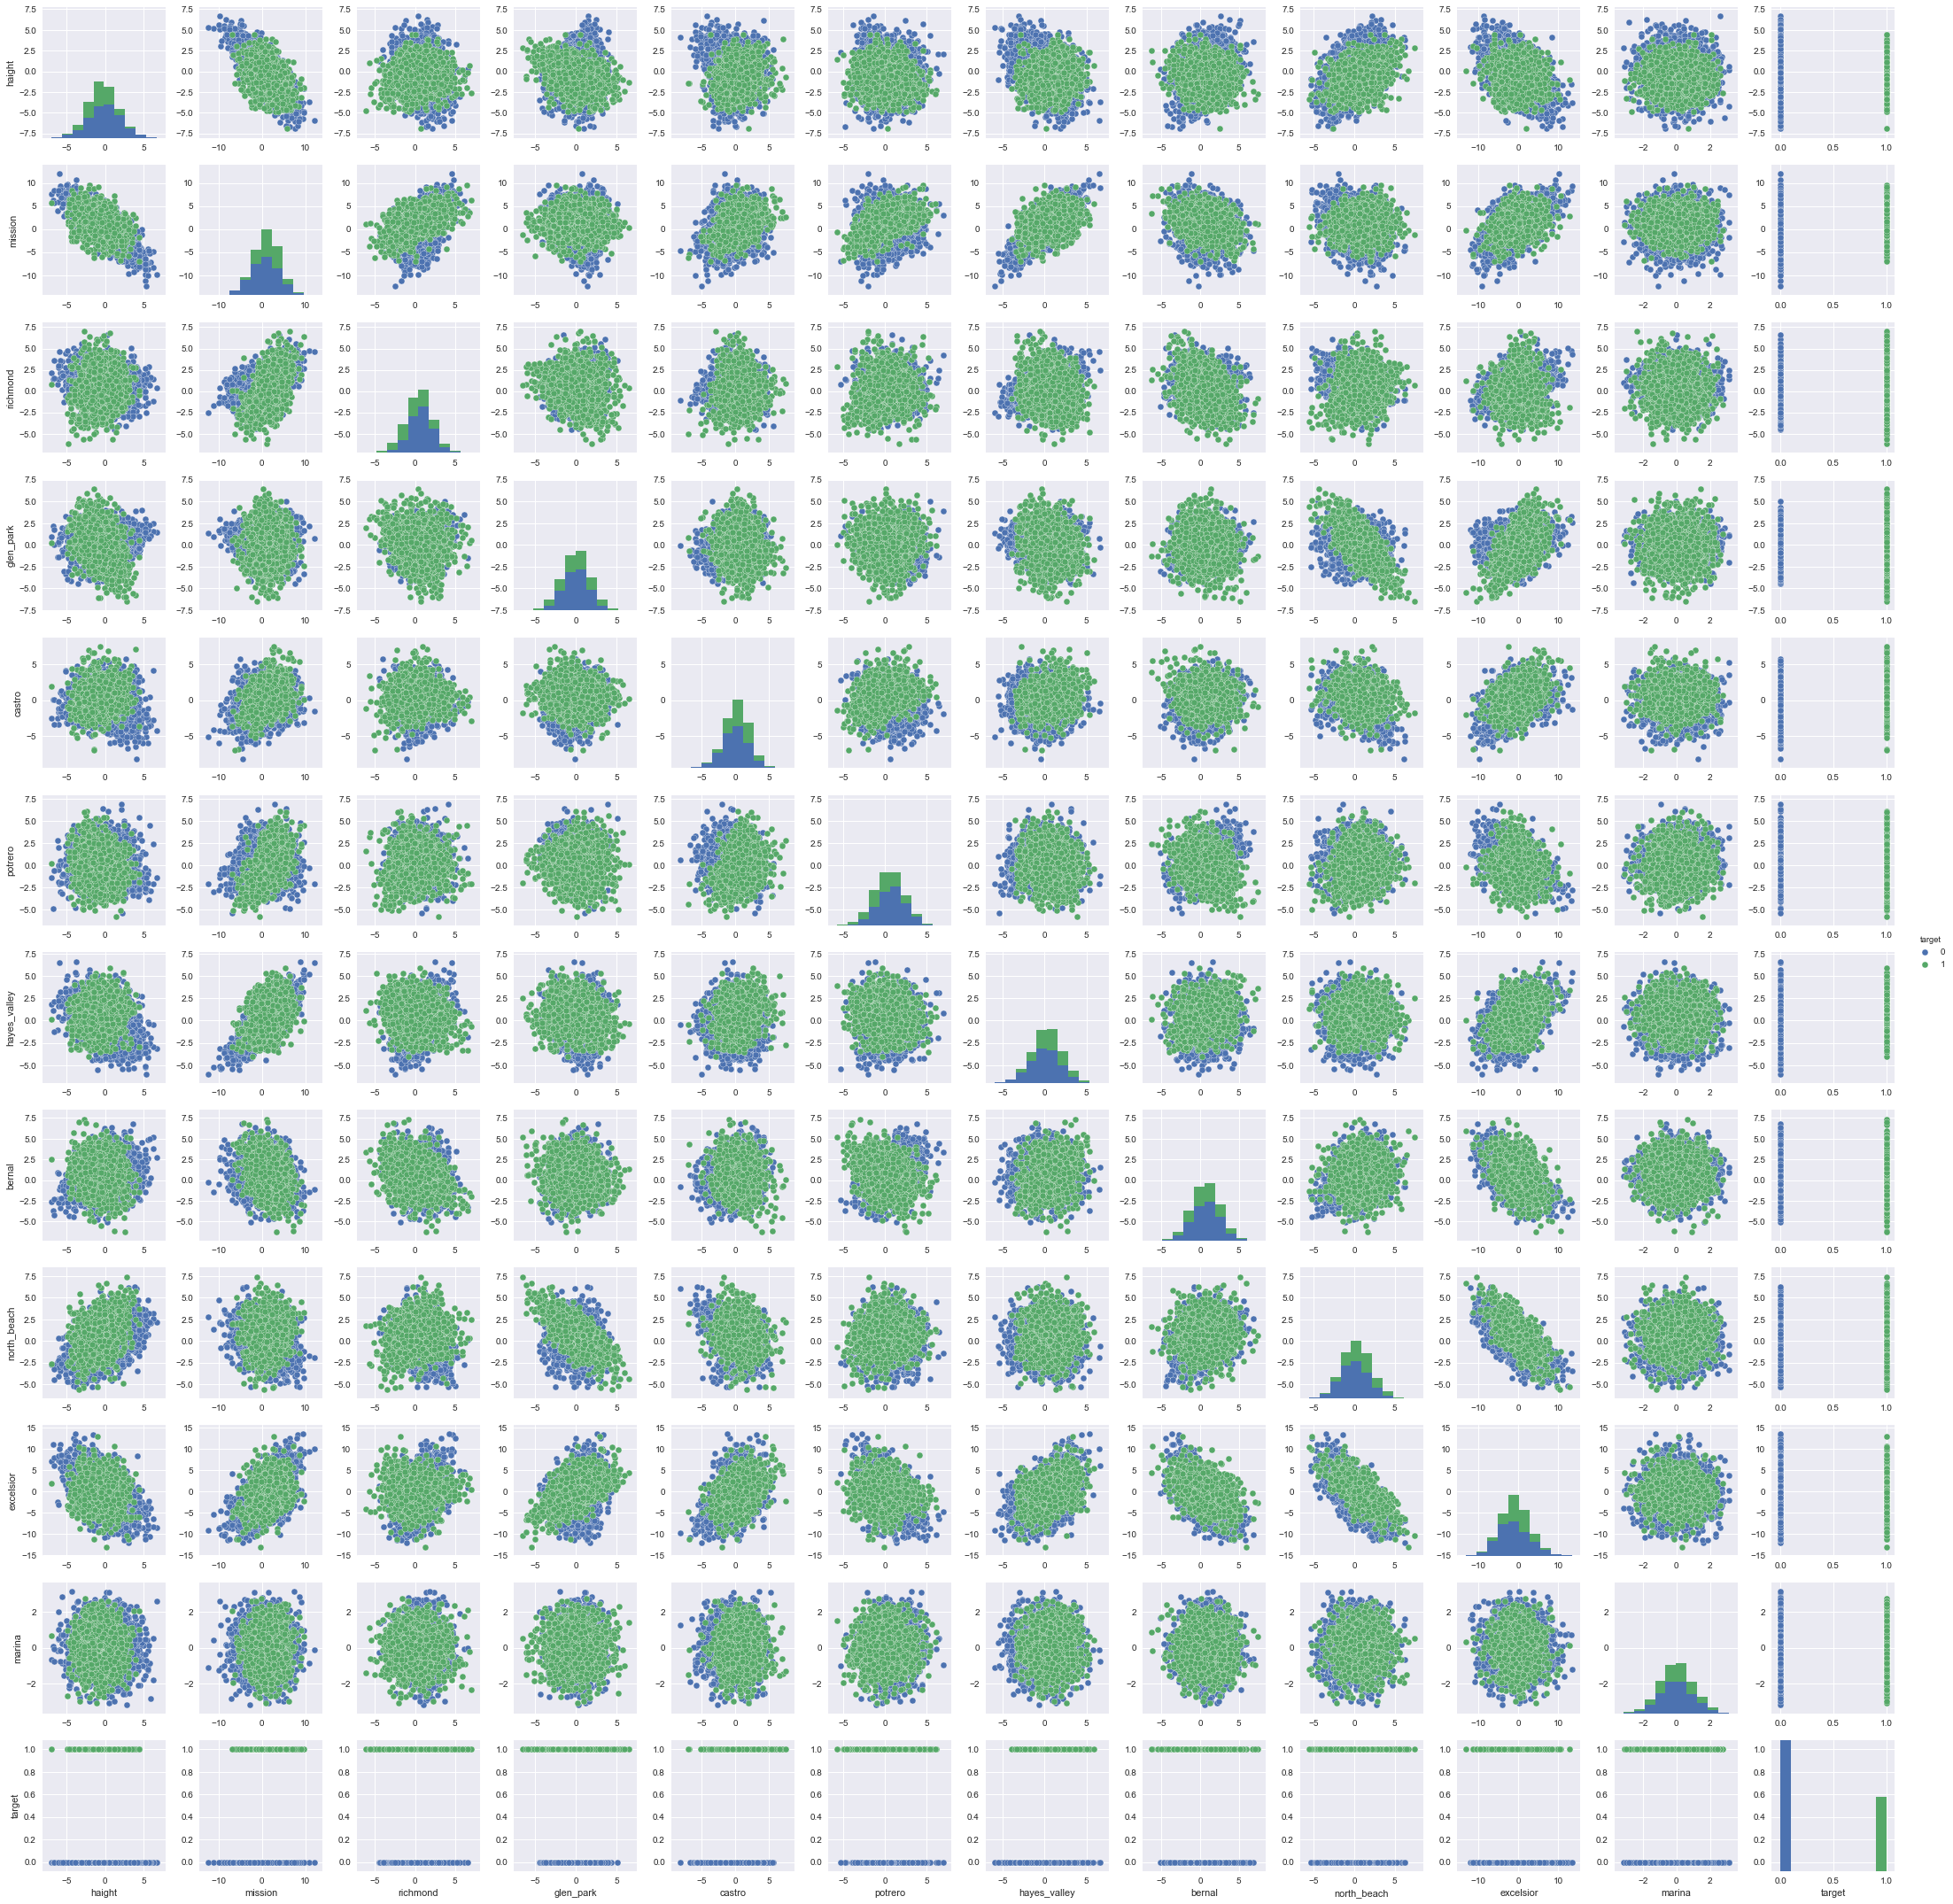

In [681]:
sns.pairplot(data3,hue='target')

In [679]:
data3.corr().target

haight         -0.171926
mission         0.136988
richmond       -0.196710
glen_park       0.005610
castro          0.187220
potrero        -0.199197
hayes_valley    0.176853
bernal         -0.011225
north_beach     0.198166
excelsior       0.121039
marina         -0.012432
target          1.000000
Name: target, dtype: float64

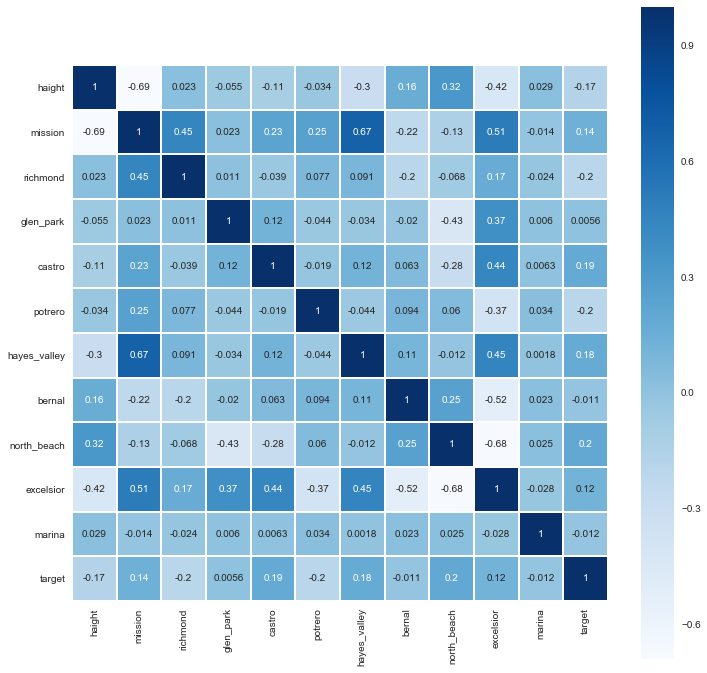

In [680]:
plt.figure(figsize=(12,12))
sns.heatmap(data3.corr(), annot=True,  cmap="Blues", square=1, linewidth=1.)

### Try remove glen_park with least correlation 
Scores dropped

In [684]:
f_cols = ['haight','mission','richmond','castro','potrero','hayes_valley',
          'bernal','north_beach','excelsior','marina']
X3 = X[f_cols]

In [688]:
ada.fit(X3,y)
cv_score2 = cross_val_score(ada, X3, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.7917344245850384

In [689]:
xg.fit(X3,y)
cv_score2 = cross_val_score(xg, X3, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.88849392069362609

In [702]:
rnd.fit(X3,y)
cv_score2 = cross_val_score(rnd, X3, y, cv =5 , scoring="accuracy").mean()
cv_score2

0.85999451131954907

### Remove feautres based on feature importance

In [771]:
def feat_sel(array):
    tmp=[]
    ada_scores=[]
    xg_scores=[]
    rnd_scores=[]
    
    for idx, val in enumerate(array):
        tmp.append(array[idx][1])
        print ('='*30)
        print tmp
        Xt=data[tmp]    
        #print Xt.head(1)
        ada.fit(Xt,y)
        cv_score = cross_val_score(ada, Xt, y, cv =5 , scoring="accuracy").mean()
        ada_scores.append(cv_score)

        xg.fit(Xt,y)
        cv_score = cross_val_score(xg, Xt, y, cv =5 , scoring="accuracy").mean()
        xg_scores.append(cv_score)

        rnd.fit(Xt,y)
        cv_score = cross_val_score(rnd, Xt, y, cv =5 , scoring="accuracy").mean()
        rnd_scores.append(cv_score)
        
    px = range(1,len(array)+1)
    plt.figure(figsize=(12,6))
    plt.plot(px,ada_scores, label='AdaBoost')
    plt.plot(px,xg_scores, label="Xgboost")      
    plt.plot(px,rnd_scores, label="RandomForest")
    plt.tight_layout()
    plt.xlabel('Number of features')
    plt.ylabel('Score')
    plt.legend()
    plt.show()
    print "ada scores: " 
    print ada_scores
    print "xg scoress: "
    print xg_scores
    print "rnd scores: " 
    print rnd_scores

['soma']
['soma', 'castro']
['soma', 'castro', 'fillmore']
['soma', 'castro', 'fillmore', 'richmond']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley', 'glen_park']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley', 'glen_park', 'sunset']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley', 'glen_park', 'sunset', 'haight']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley', 'glen_park', 'sunset', 'haight', 'mission']
['soma', 'castro', 'fillmore', 'richmond', 'hayes_valley', 'glen_park', 'sunset', 'haight', 'mission', 'potrero']


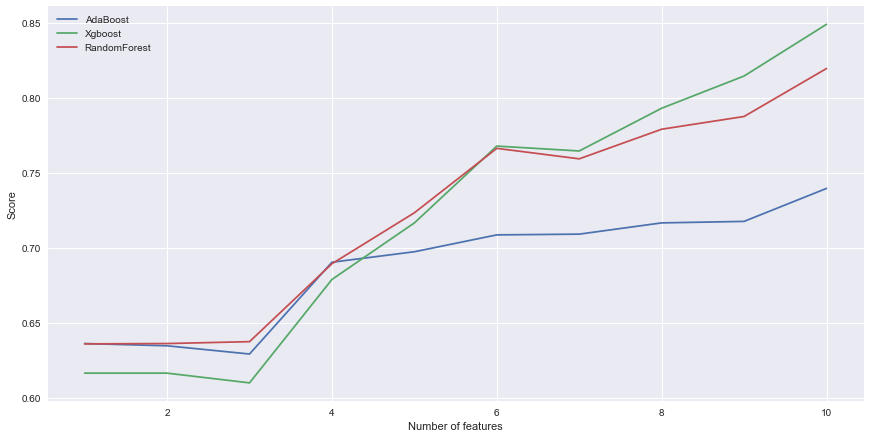

ada scores: 
[0.63625048086012637, 0.63474985351539615, 0.62925234492553905, 0.69049148201794064, 0.69749211795643429, 0.70874650546328977, 0.70924463280411376, 0.71674558085247009, 0.71774808007512514, 0.73974810820016901]
xg scoress: 
[0.61649951640549439, 0.61649420585032166, 0.61000013125020502, 0.67900303555161812, 0.71673807927824884, 0.7679922054565711, 0.7647331409892828, 0.79324536405525636, 0.81474539296155157, 0.84923887381074026]
rnd scores: 
[0.63599954453053831, 0.63624891796705929, 0.63749829609108766, 0.68949148592419673, 0.72349214998773448, 0.76648939021779727, 0.75948875896681078, 0.77924534218022212, 0.78774691679205744, 0.81974727187073726]


In [772]:
feat_sel(ada_feature)

['richmond']
['richmond', 'mission']
['richmond', 'mission', 'hayes_valley']
['richmond', 'mission', 'hayes_valley', 'potrero']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight', 'bernal']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight', 'bernal', 'castro']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight', 'bernal', 'castro', 'north_beach']
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight', 'bernal', 'castro', 'north_beach', 'excelsior']


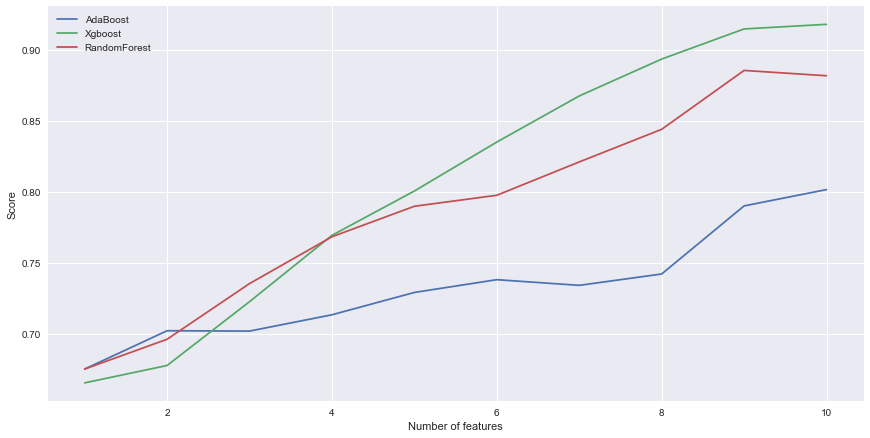

ada scores: 
[0.6749911527205511, 0.70199993867177923, 0.70174806523135191, 0.71324619804093448, 0.72899152576800907, 0.73799091795455918, 0.73399497303902028, 0.74199280077000118, 0.78999286014509396, 0.80148818474716366]
xg scoress: 
[0.66524802070003242, 0.67750022656285402, 0.72248183708099556, 0.769240959360874, 0.80048881287314511, 0.83499916640494742, 0.86748546013353156, 0.89349236483182004, 0.91474333241145689, 0.91799145897102963]
rnd scores: 
[0.67498896795151242, 0.6959974308553607, 0.73523966560885246, 0.76824127225198791, 0.78973629646296328, 0.79748818084090745, 0.82098383864662294, 0.84398074020428149, 0.88548923279567615, 0.88174016443775682]


In [773]:
feat_sel(xg_feature)

['hayes_valley']
['hayes_valley', 'soma']
['hayes_valley', 'soma', 'sunset']
['hayes_valley', 'soma', 'sunset', 'glen_park']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond', 'haight']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond', 'haight', 'mission']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond', 'haight', 'mission', 'potrero']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond', 'haight', 'mission', 'potrero', 'castro']
['hayes_valley', 'soma', 'sunset', 'glen_park', 'fillmore', 'richmond', 'haight', 'mission', 'potrero', 'castro', 'bernal']


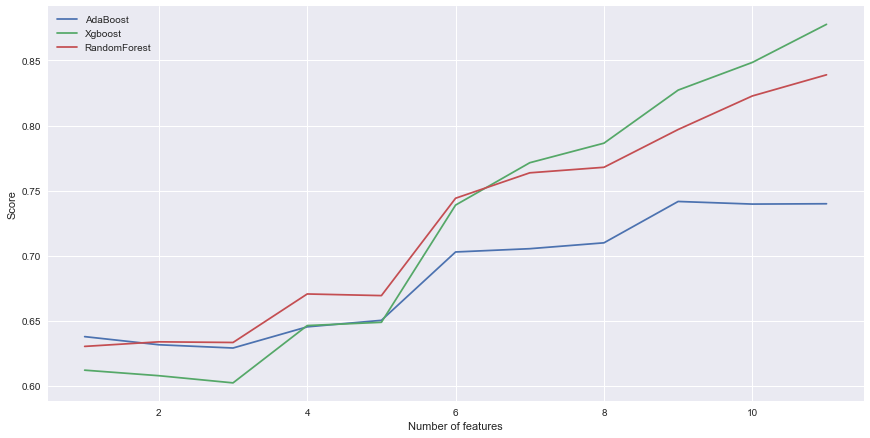

ada scores: 
[0.6379970515578931, 0.63175235351930237, 0.62925828595044675, 0.64550424024100039, 0.65050112070487609, 0.70298493552333663, 0.70549619022842225, 0.71000494492960142, 0.741748734763648, 0.73974810820016901, 0.73999873320114573]
xg scoress: 
[0.61224514764866822, 0.60800045039132866, 0.60249668866670103, 0.64648987068729791, 0.64899549725858952, 0.73898841951315541, 0.77149096014212526, 0.7865012917988935, 0.82723696912026412, 0.84848981014032832, 0.87773796794994996]
rnd scores: 
[0.6304967285105133, 0.63400079687624511, 0.63349923085817328, 0.67074302537972719, 0.6694911472517926, 0.74423779841843496, 0.76374688397950607, 0.76799376522463314, 0.79698817849715387, 0.82274290077015755, 0.83898510896110778]


In [774]:
feat_sel(rnd_feature)

### Final anwer based on 7 xgboost important features 
- Features:
['richmond', 'mission', 'hayes_valley', 'potrero', 'glen_park', 'haight', 'bernal']
- Scores: 87%

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [510]:
movies = pd.read_csv("../data/movie_metadata.csv")
movies_test = pd.read_csv("../data/movie_metadata2.csv")
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Preprocessing 
* Drop null gross
* Lable encode all object columns
* Fillna with mean

In [511]:
features=['gross','budget','duration','director_name','director_facebook_likes','actor_1_name',
          'actor_2_name','actor_3_name','actor_1_facebook_likes','actor_2_facebook_likes',
          'actor_3_facebook_likes','content_rating','genres','country','language','title_year']

In [512]:
m=movies[features]
t=movies_test[features]

In [513]:
movies_test['movie_title']

0      Proud Mary
1       Early Man
2    Amant Double
Name: movie_title, dtype: object

In [514]:
m.head()

,gross,budget,duration,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,content_rating,genres,country,language,title_year
0,760505847.0,237000000.0,178.0,James Cameron,0.0,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0,PG-13,Action|Adventure|Fantasy|Sci-Fi,USA,English,2009.0
1,309404152.0,300000000.0,169.0,Gore Verbinski,563.0,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0,PG-13,Action|Adventure|Fantasy,USA,English,2007.0
2,200074175.0,245000000.0,148.0,Sam Mendes,0.0,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0,PG-13,Action|Adventure|Thriller,UK,English,2015.0
3,448130642.0,250000000.0,164.0,Christopher Nolan,22000.0,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0,PG-13,Action|Thriller,USA,English,2012.0
4,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN,NaN,Documentary,NaN,NaN,NaN


In [515]:
gen=m['genres']

In [516]:
genre_details = list(map(str,(m['genres'])))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
# printing list of seperated genres.
print(genre)

['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show', 'Reality-TV', 'News', 'Short', 'Film-Noir']


In [517]:
for word in genre:
    m[word] = m['genres'].map(lambda s: 1 if word in str(s) else 0)

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [518]:
for word in genre:
    t[word] = t['genres'].map(lambda s: 1 if word in str(s) else 0)

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [519]:
m.drop(['genres'], axis=1, inplace=True)

In [520]:
t.drop(['genres'], axis=1, inplace=True)

In [521]:
#drop null gross
m = m[m.gross.notnull()]
#movies[movies.gross.isnull()]

In [522]:
t.head()

,gross,budget,duration,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
0,NaN,14000000,89,Babak Najafi,NaN,Taraji P. Henson,Neal McDonough,Danny Glover,6500000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,50000000,147,Nicholas Wulstan Park,NaN,Tom Hiddleston,Maisie Williams,Eddie Redmayne,4100000,118000.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,8595828,110,Fran�ois Ozon,16000.0,Marine Vacth,J�r�mie Renier,Jacqueline Bisset,19000,NaN,...,0,0,0,0,0,0,0,0,0,0


In [523]:
m.head()

,gross,budget,duration,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
0,760505847.0,237000000.0,178.0,James Cameron,0.0,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,...,0,0,0,0,0,0,0,0,0,0
1,309404152.0,300000000.0,169.0,Gore Verbinski,563.0,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,...,0,0,0,0,0,0,0,0,0,0
2,200074175.0,245000000.0,148.0,Sam Mendes,0.0,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,...,0,0,0,0,0,0,0,0,0,0
3,448130642.0,250000000.0,164.0,Christopher Nolan,22000.0,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,...,0,0,0,0,0,0,0,0,0,0
5,73058679.0,263700000.0,132.0,Andrew Stanton,475.0,Daryl Sabara,Samantha Morton,Polly Walker,640.0,632.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering 

In [524]:
#add previous gross
dir_gross = pd.DataFrame(m.groupby('director_name')['gross'].mean())
dir_gross['director_name'] = dir_gross.index
dir_gross.rename(columns={'gross':'dir_gross'}, inplace=True)

act1_gross = pd.DataFrame(m.groupby('actor_1_name')['gross'].mean())
act1_gross['actor_1_name']=act1_gross.index
act1_gross.rename(columns={'gross':'act1_gross'}, inplace=True)

act2_gross = pd.DataFrame(m.groupby('actor_2_name')['gross'].mean())
act2_gross['actor_2_name']=act2_gross.index
act2_gross.rename(columns={'gross':'act2_gross'}, inplace=True)

act3_gross = pd.DataFrame(m.groupby('actor_3_name')['gross'].mean())
act3_gross['actor_3_name']=act3_gross.index
act3_gross.rename(columns={'gross':'act3_gross'}, inplace=True)

In [525]:
m = pd.merge(m, dir_gross, how='left',on=['director_name'])
#m = pd.merge(m, act1_gross, how='left',on=['actor_1_name'])
#m = pd.merge(m, act2_gross, how='left',on=['actor_2_name'])
#m = pd.merge(m, act3_gross, how='left',on=['actor_3_name'])


In [526]:
t = pd.merge(t, dir_gross, how='left',on=['director_name'])
#t = pd.merge(t, act1_gross, how='left',on=['actor_1_name'])
#t = pd.merge(t, act2_gross, how='left',on=['actor_2_name'])
#t = pd.merge(t, act3_gross, how='left',on=['actor_3_name'])


In [527]:
def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            print(c)
    return df

In [528]:
m = df_lbl_enc(m)

director_name
actor_1_name
actor_2_name
actor_3_name
content_rating
country
language


In [529]:
t = df_lbl_enc(t)

director_name
actor_1_name
actor_2_name
actor_3_name
content_rating
country
language


In [530]:
m.fillna(0, inplace=True)

In [531]:
t.fillna(0, inplace=True)

In [532]:
t.drop(['gross'], axis=1, inplace=True)

In [533]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;
from sklearn.cross_validation import train_test_split, cross_val_score
import scipy, scipy.stats
from sklearn.metrics import mean_squared_error


In [534]:
X = m.drop(['gross'], axis=1)
y = m['gross']

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## LinearRegression

In [536]:
lr = LinearRegression()
lr_score = cross_val_score(lr, X, y, cv = 5).mean()

In [537]:
lr_score

0.25667990744115177

In [538]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [539]:
y_pred = lr.predict(X_test)

In [540]:
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

38635229.305520214

## Polynomial Regression

In [541]:
poly = PolynomialFeatures(degree=2)
pX = poly.fit_transform(X_train) 
pX_test = poly.fit_transform(X_test) 
lr.fit(pX, y_train)
lr.score(pX_test,y_test)

0.55161900410279729

In [542]:

y_pred = lr.predict(pX_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

43341403.25846453

## Ridge

In [543]:
ridge = Ridge(alpha=0.9)
ridge.fit(X_train,y_train)
ridge.score(X_test ,y_test)


/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.22882037909e-21 / 1.11022302463e-16
  RuntimeWarning)


0.6437178886349203

In [544]:
y_pred = ridge.predict(X_test)
rrms = np.sqrt(mean_squared_error(y_test, y_pred))
rrms

38634596.278473765

In [545]:
#Alpha values for ridge model
ridge_alphas = np.logspace(-4, 2.5, 50)

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.80980042121e-25 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.88522835498e-25 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.07020588837e-24 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.55280920147e-20 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.46474612567e-20 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.70245316744e-20 / 1.11022302463e-16
  RuntimeWarning)
/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

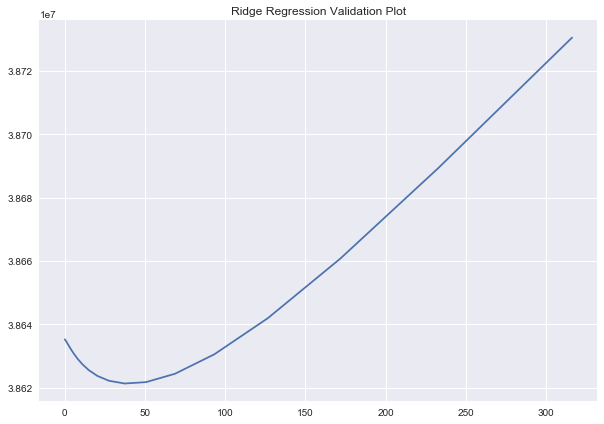

In [546]:
ridge_cv_scores = []

for i in ridge_alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    rrms = np.sqrt(mean_squared_error(y_test, y_pred))
    ridge_cv_scores.append(rrms)

plt.figure(figsize=(10, 7))
plt.title("Ridge Regression Validation Plot")
plt.plot(ridge_alphas, ridge_cv_scores);

In [547]:
ridge_alphas

array([  1.00000000e-04,   1.35722878e-04,   1.84206997e-04,
         2.50011038e-04,   3.39322177e-04,   4.60537826e-04,
         6.25055193e-04,   8.48342898e-04,   1.15139540e-03,
         1.56270698e-03,   2.12095089e-03,   2.87861559e-03,
         3.90693994e-03,   5.30261134e-03,   7.19685673e-03,
         9.76778110e-03,   1.32571137e-02,   1.79929362e-02,
         2.44205309e-02,   3.31442475e-02,   4.49843267e-02,
         6.10540230e-02,   8.28642773e-02,   1.12465782e-01,
         1.52641797e-01,   2.07169840e-01,   2.81176870e-01,
         3.81621341e-01,   5.17947468e-01,   7.02973212e-01,
         9.54095476e-01,   1.29492584e+00,   1.75751062e+00,
         2.38534401e+00,   3.23745754e+00,   4.39397056e+00,
         5.96362332e+00,   8.09400122e+00,   1.09854114e+01,
         1.49097166e+01,   2.02358965e+01,   2.74647411e+01,
         3.72759372e+01,   5.05919749e+01,   6.86648845e+01,
         9.31939576e+01,   1.26485522e+02,   1.71669791e+02,
         2.32995181e+02,

In [548]:
ridge_cv_scores

[38635229.247457318,
 38635229.226693138,
 38635229.198510975,
 38635229.160260558,
 38635229.108344615,
 38635229.037880197,
 38635228.942239106,
 38635228.812423468,
 38635228.636217728,
 38635228.397036269,
 38635228.072356969,
 38635227.631590486,
 38635227.033179857,
 38635226.220647685,
 38635225.117200598,
 38635223.618347742,
 38635221.581769854,
 38635218.813351169,
 38635215.047794506,
 38635209.921469875,
 38635202.933899611,
 38635193.39220494,
 38635180.329335906,
 38635162.38108553,
 38635137.597752117,
 38635103.153698146,
 38635054.905104309,
 38634986.743450798,
 38634889.719892554,
 38634750.99510248,
 38634552.796284452,
 38634271.683417998,
 38633878.466091514,
 38633339.076477893,
 38632616.73073291,
 38631675.938857034,
 38630489.278667092,
 38629048.014565833,
 38627377.290418476,
 38625555.8409518,
 38623739.863842711,
 38622192.461942025,
 38621324.333612539,
 38621754.391831651,
 38624393.117757469,
 38630533.474999167,
 38641913.679341234,
 38660707.255084693

## Lasso

In [549]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso.score(X_test ,y_test)

0.64370622841478142

In [550]:
#Alpha values for lasso model
lasso_alphas = np.logspace(-4, 0, 50)

In [551]:
lasso_cv_scores

[42198202.955621637,
 42198202.955114223,
 42198202.954501979,
 42198202.953762859,
 42198202.952871002,
 42198202.951794781,
 42198202.950495914,
 42198202.948928468,
 42198202.947036833,
 42198202.944754183,
 42198202.941999577,
 42198202.938675061,
 42198202.934663124,
 42198202.929821588,
 42198202.92397882,
 42198202.916927874,
 42198202.90841867,
 42198202.898150034,
 42198202.885757893,
 42198202.870802991,
 42198202.852755845,
 42198202.830976591,
 42198202.804693282,
 42198202.772974953,
 42198202.734697312,
 42198202.688504368,
 42198202.632759169,
 42198202.565485947,
 42198202.484301277,
 42198202.38632831,
 42198202.268095195,
 42198202.12541227,
 42198201.953223594,
 42198201.745427586,
 42198201.494660936,
 42198201.192037664,
 42198200.826834075,
 42198200.386108965,
 42198199.854245499,
 42198199.212396495,
 42198198.437817931,
 42198197.503062405,
 42198196.375006512,
 42198195.013677284,
 42198193.370835684,
 42198191.388267212,
 42198188.995719165,
 42198186.1084112

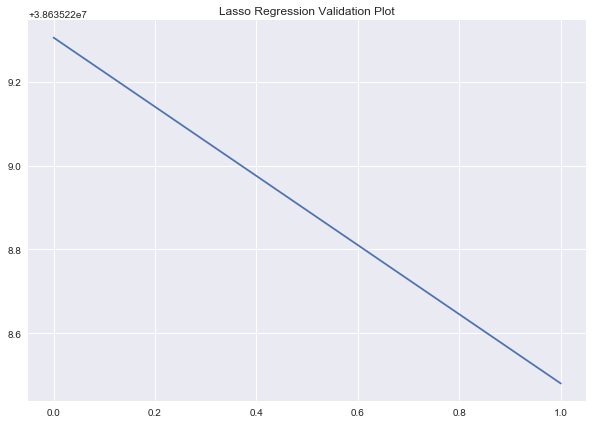

In [552]:
lasso_cv_scores = []

for i in lasso_alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    lrms = np.sqrt(mean_squared_error(y_test, y_pred))
    lasso_cv_scores.append(lrms)

plt.figure(figsize=(10, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

## RidgeRegression has best rMSE, we will use it to predict revenue for new movies

In [554]:
ridge = Ridge(alpha=2)
ridge.fit(X,y)
y_pred = ridge.predict(t)
y_pred

array([  8.40436701e+08,   4.28001027e+08,   4.77467612e+07])

- Proud Mary  =>  $840,436,701

- Early Man   =>  $428,001,027 

- Amant Double => $47,746,761

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.